# Feature Analysis

## Read data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("ground_vi_data.csv")
df.head()

,date,hemispherical,longitude,latitude,region,ndre,lci,severity_level
0,19/01/22,IMG_3761_2,104.541217,-2.925328,1-bpm24,0.179929,0.263949,2
1,19/01/22,IMG_3754_2,104.541035,-2.925307,1-bpm24,0.186941,0.282940,3
2,19/01/22,IMG_3746_2,104.541010,-2.925442,1-bpm24,0.182272,0.266318,3
3,19/01/22,IMG_3737_2,104.541267,-2.925553,1-bpm24,0.188025,0.278577,2
4,19/01/22,IMG_3731_2,104.541405,-2.925567,1-bpm24,0.178248,0.266711,2


In [3]:
# Create period column
df['period'] = [int(x.split("-")[0]) for x in list(df['region'])]
df.head()

,date,hemispherical,longitude,latitude,region,ndre,lci,severity_level,period
0,19/01/22,IMG_3761_2,104.541217,-2.925328,1-bpm24,0.179929,0.263949,2,1
1,19/01/22,IMG_3754_2,104.541035,-2.925307,1-bpm24,0.186941,0.282940,3,1
2,19/01/22,IMG_3746_2,104.541010,-2.925442,1-bpm24,0.182272,0.266318,3,1
3,19/01/22,IMG_3737_2,104.541267,-2.925553,1-bpm24,0.188025,0.278577,2,1
4,19/01/22,IMG_3731_2,104.541405,-2.925567,1-bpm24,0.178248,0.266711,2,1


In [4]:
# Rearrange columns
df = df[['date', 'hemispherical', 'longitude', 'latitude', 'region','period',
         'ndre', 'lci', 'severity_level']]

In [5]:
# Shape of data
df.shape

(144, 9)

In [6]:
# Create df copy
df_copy = df.copy()

## Data Pengambilan I

In [7]:
# Extract data pengambilan I
df1 = df[df["period"] == 1]
df1.head()

,date,hemispherical,longitude,latitude,region,period,ndre,lci,severity_level
0,19/01/22,IMG_3761_2,104.541217,-2.925328,1-bpm24,1,0.179929,0.263949,2
1,19/01/22,IMG_3754_2,104.541035,-2.925307,1-bpm24,1,0.186941,0.282940,3
2,19/01/22,IMG_3746_2,104.541010,-2.925442,1-bpm24,1,0.182272,0.266318,3
3,19/01/22,IMG_3737_2,104.541267,-2.925553,1-bpm24,1,0.188025,0.278577,2
4,19/01/22,IMG_3731_2,104.541405,-2.925567,1-bpm24,1,0.178248,0.266711,2


### Boxplot

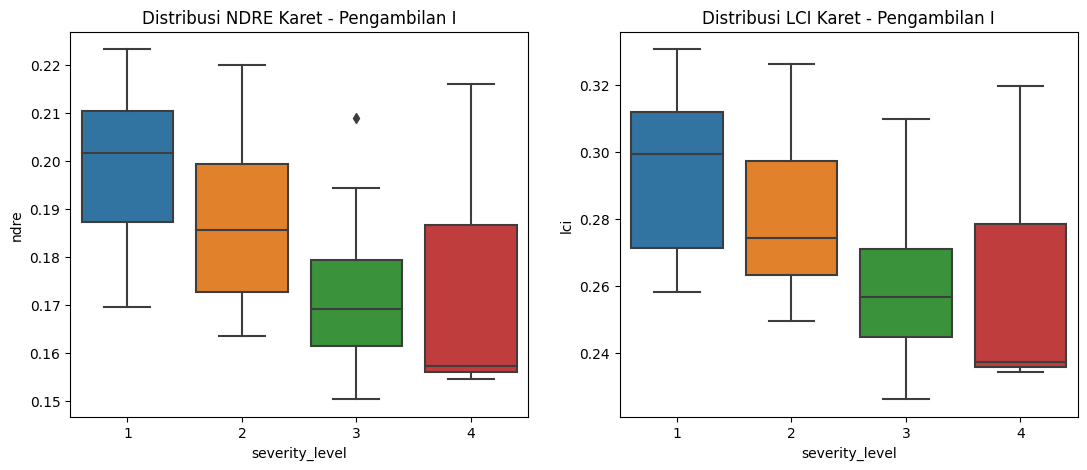

In [8]:
# Show boxplot
plt.subplots(figsize=(13, 5))
plt.subplot(1,2,1)
sns.boxplot(y='ndre', x='severity_level', data=df1)
plt.title("Distribusi NDRE Karet - Pengambilan I")
plt.subplot(1,2,2)
sns.boxplot(y='lci', x='severity_level', data=df1)
plt.title("Distribusi LCI Karet - Pengambilan I")
plt.show()

In [9]:
# Show len of df1 on level 4
len(df1[df1.severity_level == 4])

3

Berdasarkan boxplot diatas, terdapat outlier pada ndre_karet pada level severity 3. Selain itu, level 4 sebarannya hampir mencakup keseluruhan level yang disebabkan oleh data yang sangat sedikit untuk level 4.

In [10]:
# Show outlier data
out_ndre = df1[(df1['ndre'] > 0.2) & (df1['severity_level'] == 3)]
out_ndre

,date,hemispherical,longitude,latitude,region,period,ndre,lci,severity_level
34,19/01/22,IMG_3486_2,104.518597,-2.949746,1-gt1,1,0.208933,0.30967,3


**Show hemispherical data**

<div>
    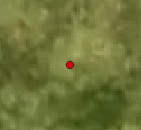&nbsp&nbsp&nbsp&nbsp
    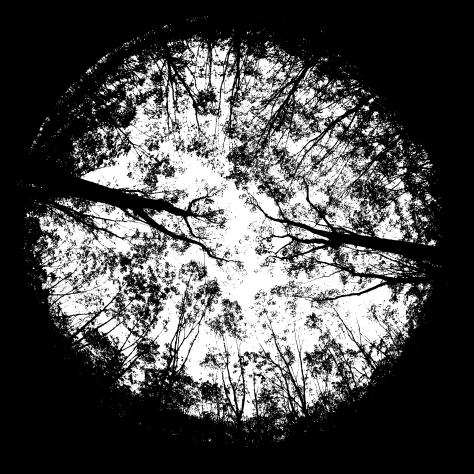
</div>

Terdapat kesalahan pelabelan dimana seharusnya merupakan level 1 tetapi dilabeli dengan level 3. Hal ini dapat dibuktikan pada citra ground truth kanopinya masih rapat dan belum mengalami gugur daun > 50%.

Kesimpulannya : Data outlier merupakan hasil pelabelan data yang salah.

### Scatterplot

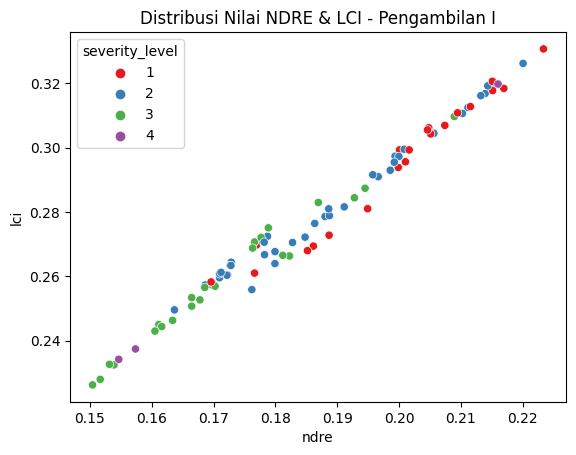

In [11]:
# Show boxplot
sns.scatterplot(y='lci', x='ndre', hue='severity_level', data=df1, palette='Set1')
plt.title("Distribusi Nilai NDRE & LCI - Pengambilan I")
plt.show()

Terdapat beberapa data level severity yang overlap dengan lebih dari 1 level. 

## Data Gabungan (Pengambilan I dan II)

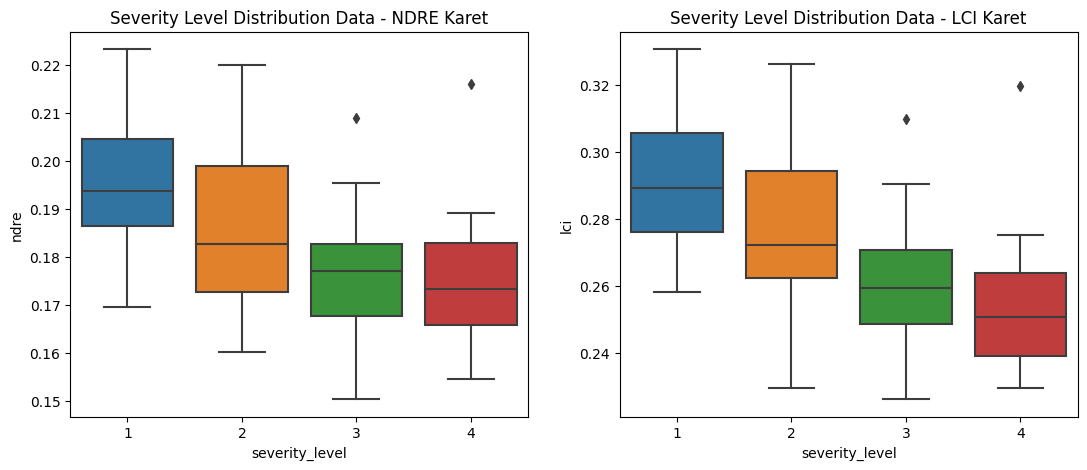

In [12]:
# Show boxplot
plt.subplots(figsize=(13, 5))
plt.subplot(1,2,1)
sns.boxplot(y='ndre', x='severity_level', data=df)
plt.title("Severity Level Distribution Data - NDRE Karet")
plt.subplot(1,2,2)
sns.boxplot(y='lci', x='severity_level', data=df)
plt.title("Severity Level Distribution Data - LCI Karet")
plt.show()

Pada sebaran ndre, antara severity dengan level 3 dan 4 relatif tidak dapat dibedakan secara jelas. Selain itu terdata outliers pada level 3 dan 4.\
Pada sebaran lci, semua level severity dapat dibedakan dengan cukup jelas meskipun terdapat outliers pada level 3 dan 4.

In [13]:
# Show outliers - lci
out_ndre = df[(df['lci'] > 0.3) & ((df['severity_level'] == 3) | (df['severity_level'] == 4))]
out_ndre

,date,hemispherical,longitude,latitude,region,period,ndre,lci,severity_level
34,19/01/22,IMG_3486_2,104.518597,-2.949746,1-gt1,1,0.208933,0.309670,3
53,18/01/22,IMG_3491_1,104.518596,-2.950861,1-gt1,1,0.215986,0.319758,4


**Show hemisperical data that relate to outliers**\
IMG_3491_1
<div>
    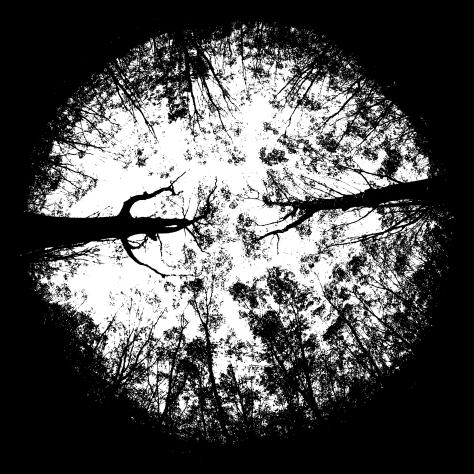&nbsp&nbsp&nbsp
    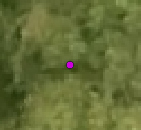
</div>

IMG_3486_2
<div>
    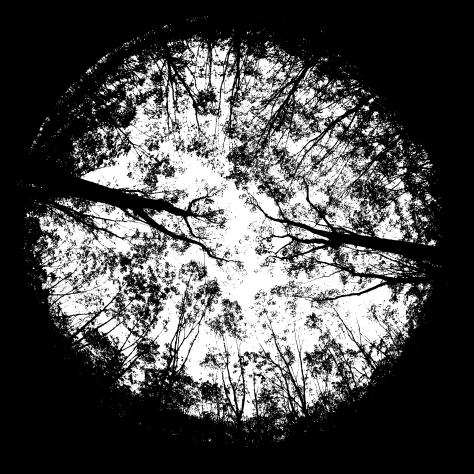&nbsp&nbsp&nbsp
    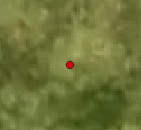
</div>

## Scatterplot

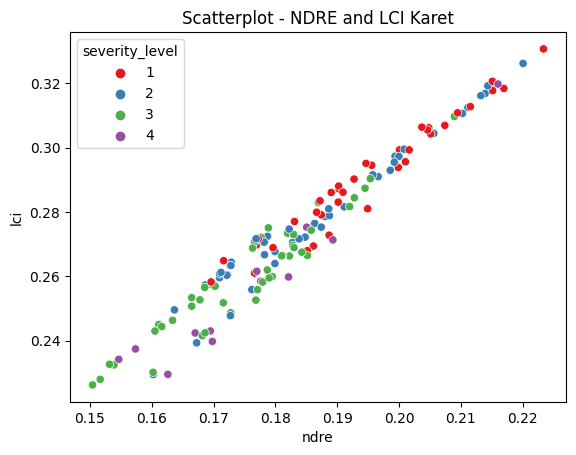

In [14]:
# For Karet data
sns.scatterplot(x='ndre', y='lci', data=df, hue='severity_level', palette='Set1')
plt.title("Scatterplot - NDRE and LCI Karet")
plt.show()

Terdapat level yang overlap dengan lebih dari 1 level. Selain itu, terdapat outlier pada masing-masing level. 

## Overlapping Data

Batasan nilai utk NDRE dan LCI:
1. Level 1 --> NDRE >= 0.205 dan LCI >= 0.3
2. Level 2 --> 0.175 < NDRE < 0.205 dan 0.27 < LCI < 0.3 
3. Level 3 --> NDRE <= 0.175 dan LCI <= 0.27

In [15]:
# Extract data for each level
ndre_level1 = df[df['severity_level'] == 1]['ndre'].tolist()
ndre_level2 = df[df['severity_level'] == 2]['ndre'].tolist()
ndre_level3 = df[df['severity_level'] == 3]['ndre'].tolist()
ndre_level4 = df[df['severity_level'] == 4]['ndre'].tolist()

lci_level1 = df[df['severity_level'] == 1]['lci'].tolist()
lci_level2 = df[df['severity_level'] == 2]['lci'].tolist()
lci_level3 = df[df['severity_level'] == 3]['lci'].tolist()
lci_level4 = df[df['severity_level'] == 4]['lci'].tolist()

In [16]:
# Count mean and median for each level - NDRE
median_level1_ndre = np.median(ndre_level1)
median_level2_ndre = np.median(ndre_level2)
median_level3_ndre = np.median(ndre_level3)
median_level4_ndre = np.median(ndre_level4)
print("Median Level 1 - NDRE :", median_level1_ndre)
print("Median Level 2 - NDRE :", median_level2_ndre)
print("Median Level 3 - NDRE :", median_level3_ndre)
print("Median Level 4 - NDRE :", median_level4_ndre)

Median Level 1 - NDRE : 0.19368204
Median Level 2 - NDRE : 0.18276742
Median Level 3 - NDRE : 0.17711057
Median Level 4 - NDRE : 0.173405325


In [17]:
# Count mean and median for each level - LCI
median_level1_lci = np.median(lci_level1)
median_level2_lci = np.median(lci_level2)
median_level3_lci = np.median(lci_level3)
median_level4_lci = np.median(lci_level4)
print("Median Level 1 - LCI :", median_level1_lci)
print("Median Level 2 - LCI :", median_level2_lci)
print("Median Level 3 - LCI :", median_level3_lci)
print("Median Level 4 - LCI :", median_level4_lci)

Median Level 1 - LCI : 0.28912251
Median Level 2 - LCI : 0.27217284
Median Level 3 - LCI : 0.25949356
Median Level 4 - LCI : 0.250735175


### Selisih Level > 1

In [18]:
# Level 1 data overlapping with Level 3 Area
df_1o3 = df[(df['severity_level'] == 1) & (df['ndre'] <= 0.175) & 
            (df['lci'] <= 0.27)]
df_1o3['overlapping_level'] = np.full(3, 3)
df_1o3

,date,hemispherical,longitude,latitude,region,period,ndre,lci,severity_level,overlapping_level
16,19/01/22,IMG_3905_1,104.541543,-2.924376,1-bpm24,1,0.172263,0.260449,1,3
79,18/01/22,IMG_3788_1,104.509915,-2.953475,1-rric100,1,0.169608,0.258247,1,3
105,15/06/22,IMG_4314_A,104.541359,-2.924451,2-bpm24,2,0.171635,0.264855,1,3


In [19]:
# Level 3 data overlapping with Level 1 Area
df_3o1 = df[(df['severity_level'] == 3) & (df['ndre'] >= 0.205) & 
            (df['lci'] >= 0.3)]
df_3o1['overlapping_level'] = np.full(1, 1)
df_3o1

,date,hemispherical,longitude,latitude,region,period,ndre,lci,severity_level,overlapping_level
34,19/01/22,IMG_3486_2,104.518597,-2.949746,1-gt1,1,0.208933,0.30967,3,1


In [20]:
# Level 4 data overlapping with Level 1 Area
df_4o1 = df[(df['severity_level'] == 4) & (df['ndre'] >= 0.205) & 
            (df['lci'] >= 0.3)]
df_4o1['overlapping_level'] = np.full(1, 1)
df_4o1

,date,hemispherical,longitude,latitude,region,period,ndre,lci,severity_level,overlapping_level
53,18/01/22,IMG_3491_1,104.518596,-2.950861,1-gt1,1,0.215986,0.319758,4,1


In [21]:
# Level 4 data overlapping with Level 2 Area
df_4o2 = df[(df['severity_level'] == 4) & (df['ndre'] > 0.175) & (df['ndre'] < 0.205) & 
            (df['lci'] > 0.27) & (df['lci'] < 0.3)]
df_4o2['overlapping_level'] = np.full(2, 2)
df_4o2

,date,hemispherical,longitude,latitude,region,period,ndre,lci,severity_level,overlapping_level
112,15/06/22,IMG_4271_B,104.518755,-2.950853,2-gt1,2,0.189297,0.271320,4,2
114,15/06/22,IMG_4027_B,104.518790,-2.949697,2-gt1,2,0.185066,0.275263,4,2


In [22]:
# Merge all data
df_overlapping_more1 = pd.concat([df_1o3, df_3o1, df_4o1, df_4o2], axis=0)
df_overlapping_more1

,date,hemispherical,longitude,latitude,region,period,ndre,lci,severity_level,overlapping_level
16,19/01/22,IMG_3905_1,104.541543,-2.924376,1-bpm24,1,0.172263,0.260449,1,3
79,18/01/22,IMG_3788_1,104.509915,-2.953475,1-rric100,1,0.169608,0.258247,1,3
105,15/06/22,IMG_4314_A,104.541359,-2.924451,2-bpm24,2,0.171635,0.264855,1,3
34,19/01/22,IMG_3486_2,104.518597,-2.949746,1-gt1,1,0.208933,0.309670,3,1
53,18/01/22,IMG_3491_1,104.518596,-2.950861,1-gt1,1,0.215986,0.319758,4,1
112,15/06/22,IMG_4271_B,104.518755,-2.950853,2-gt1,2,0.189297,0.271320,4,2
114,15/06/22,IMG_4027_B,104.518790,-2.949697,2-gt1,2,0.185066,0.275263,4,2


Total ada 8 data yang overlapping dengan selisih level lebih dari 1.

In [23]:
# Replace old severity level with overlapping level
idx_more1 = df_overlapping_more1.index
df_copy.loc[idx_more1, 'severity_level'] = df_overlapping_more1.loc[idx_more1, 'overlapping_level']
df_copy.loc[idx_more1]

,date,hemispherical,longitude,latitude,region,period,ndre,lci,severity_level
16,19/01/22,IMG_3905_1,104.541543,-2.924376,1-bpm24,1,0.172263,0.260449,3
79,18/01/22,IMG_3788_1,104.509915,-2.953475,1-rric100,1,0.169608,0.258247,3
105,15/06/22,IMG_4314_A,104.541359,-2.924451,2-bpm24,2,0.171635,0.264855,3
34,19/01/22,IMG_3486_2,104.518597,-2.949746,1-gt1,1,0.208933,0.309670,1
53,18/01/22,IMG_3491_1,104.518596,-2.950861,1-gt1,1,0.215986,0.319758,1
112,15/06/22,IMG_4271_B,104.518755,-2.950853,2-gt1,2,0.189297,0.271320,2
114,15/06/22,IMG_4027_B,104.518790,-2.949697,2-gt1,2,0.185066,0.275263,2


### Selisih = 1

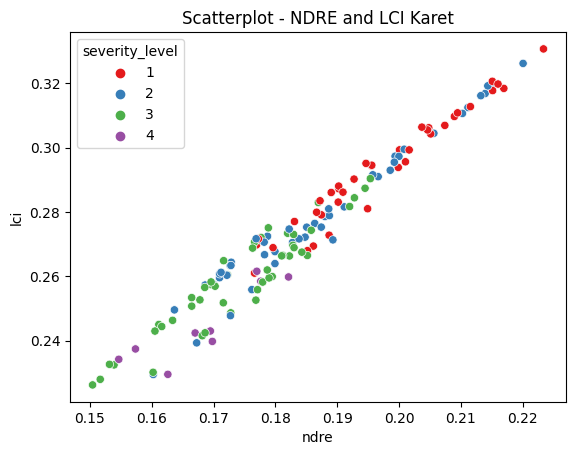

In [24]:
# Scatter plot of ndre and lci
sns.scatterplot(x='ndre', y='lci', data=df_copy, hue='severity_level', palette='Set1')
plt.title("Scatterplot - NDRE and LCI Karet")
plt.show()

In [25]:
# Level 1 data overlapping with Level 2 Area
df_1o2 = df[(df['severity_level'] == 1) & (df['ndre'] > 0.175) & 
             (df['ndre'] < 0.205) & (df['lci'] < 0.3)]
df_1o2

,date,hemispherical,longitude,latitude,region,period,ndre,lci,severity_level
9,19/01/22,IMG_3997_1,104.541337,-2.924778,1-bpm24,1,0.176628,0.260991,1
12,19/01/22,IMG_3966_1,104.541624,-2.924911,1-bpm24,1,0.194910,0.281003,1
13,19/01/22,IMG_3944_1,104.541769,-2.924940,1-bpm24,1,0.188683,0.272774,1
14,19/01/22,IMG_3933_1,104.541832,-2.924716,1-bpm24,1,0.186141,0.269391,1
15,19/01/22,IMG_3911_1,104.541798,-2.924506,1-bpm24,1,0.185184,0.267961,1
18,19/01/22,IMG_3542_2,104.520047,-2.950275,1-gt1,1,0.199864,0.293842,1
31,19/01/22,IMG_3492_2,104.518765,-2.949758,1-gt1,1,0.201023,0.295590,1
39,18/01/22,IMG_3600_1,104.519423,-2.950421,1-gt1,1,0.200068,0.299291,1
50,18/01/22,IMG_3510_1,104.518926,-2.950538,1-gt1,1,0.201626,0.299277,1
61,19/01/22,IMG_3584_2,104.510001,-2.954472,1-rric100,1,0.176952,0.269757,1


In [26]:
# Level 2 data overlapping with Level 1 Area
df_2o1 = df[(df['severity_level'] == 2) & (df['ndre'] >= 0.205) & (df['lci'] >= 0.3)]
df_2o1

,date,hemispherical,longitude,latitude,region,period,ndre,lci,severity_level
21,19/01/22,IMG_3530_2,104.519613,-2.950080,1-gt1,1,0.215211,0.319434,2
22,19/01/22,IMG_3526_2,104.519785,-2.950061,1-gt1,1,0.213906,0.316811,2
24,19/01/22,IMG_3516_2,104.519950,-2.949817,1-gt1,1,0.205620,0.304447,2
26,19/01/22,IMG_3508_2,104.519604,-2.949798,1-gt1,1,0.211125,0.312459,2
28,19/01/22,IMG_3502_2,104.518932,-2.949749,1-gt1,1,0.213212,0.316138,2
30,19/01/22,IMG_3496_2,104.518777,-2.949967,1-gt1,1,0.210239,0.310625,2
32,19/01/22,IMG_3490_2,104.518779,-2.949497,1-gt1,1,0.220039,0.326164,2
35,19/01/22,IMG_3484_2,104.518591,-2.949984,1-gt1,1,0.214337,0.319193,2


In [27]:
# Level 2 data overlapping with Level 3 Area
df_2o3 = df[(df['severity_level'] == 2) & (df['ndre'] <= 0.175) & (df['lci'] <= 0.27)]
df_2o3

,date,hemispherical,longitude,latitude,region,period,ndre,lci,severity_level
54,19/01/22,IMG_3622_2,104.509755,-2.954125,1-rric100,1,0.171737,0.260569,2
56,19/01/22,IMG_3610_2,104.509913,-2.954210,1-rric100,1,0.172862,0.264366,2
57,19/01/22,IMG_3603_2,104.509925,-2.954132,1-rric100,1,0.172689,0.263348,2
58,19/01/22,IMG_3598_2,104.510093,-2.954096,1-rric100,1,0.172815,0.263366,2
59,19/01/22,IMG_3594_2,104.510093,-2.954257,1-rric100,1,0.163679,0.249561,2
60,19/01/22,IMG_3587_2,104.510132,-2.954423,1-rric100,1,0.169984,0.257581,2
63,19/01/22,IMG_3577_2,104.509085,-2.954495,1-rric100,1,0.170974,0.259559,2
73,18/01/22,IMG_3872_1,104.509936,-2.953877,1-rric100,1,0.172165,0.260332,2
75,18/01/22,IMG_3842_1,104.509973,-2.953667,1-rric100,1,0.168641,0.257288,2
76,18/01/22,IMG_3829_1,104.509898,-2.953662,1-rric100,1,0.170996,0.260761,2


In [28]:
# Level 3 data overlapping with Level 2 Area
df_3o2 = df[(df['severity_level'] == 3) & (df['ndre'] > 0.175) & (df['ndre'] < 0.205) & 
            (df['lci'] > 0.27) & (df['lci'] < 0.3)]
df_3o2

,date,hemispherical,longitude,latitude,region,period,ndre,lci,severity_level
1,19/01/22,IMG_3754_2,104.541035,-2.925307,1-bpm24,1,0.186941,0.282940,3
40,18/01/22,IMG_3592_1,104.519421,-2.950655,1-gt1,1,0.192774,0.284399,3
52,18/01/22,IMG_3495_1,104.518759,-2.950795,1-gt1,1,0.194496,0.287363,3
65,19/01/22,IMG_3570_2,104.508938,-2.954288,1-rric100,1,0.176635,0.270668,3
67,19/01/22,IMG_3561_2,104.508788,-2.954488,1-rric100,1,0.178863,0.275064,3
68,19/01/22,IMG_3557_2,104.508738,-2.954297,1-rric100,1,0.177690,0.272073,3
122,15/06/22,IMG_4065_B,104.518788,-2.950127,2-gt1,2,0.181976,0.273378,3
123,15/06/22,IMG_4067_A,104.518758,-2.950431,2-gt1,2,0.182942,0.273015,3
129,15/06/22,IMG_4104_B,104.519585,-2.950155,2-gt1,2,0.195349,0.290354,3
130,15/06/22,IMG_4101_A,104.519516,-2.950467,2-gt1,2,0.191999,0.281686,3


In [29]:
# Extract indexes for each overlapping level
idx_1o2 = list(df_1o2.index)
idx_2o1 = list(df_2o1.index)
idx_2o3 = list(df_2o3.index)
idx_3o2 = list(df_3o2.index)
# Merge all of overlapping indexes
idx1 = idx_1o2 + idx_2o1 + idx_2o3 + idx_3o2
print(idx1)
print("Length of data :", len(idx1))

[9, 12, 13, 14, 15, 18, 31, 39, 50, 61, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 106, 21, 22, 24, 26, 28, 30, 32, 35, 54, 56, 57, 58, 59, 60, 63, 73, 75, 76, 77, 110, 121, 138, 1, 40, 52, 65, 67, 68, 122, 123, 129, 130, 139]
Length of data : 58


### Option 1 : Remove Overlapping Data

In [30]:
df_remove = df_copy.drop(idx1, axis=0)
df_remove.shape, df_copy.shape

((86, 9), (144, 9))

In [42]:
# Show data distribution after dropping overlapping data
df_remove['severity_level'].value_counts()

severity_level
3    36
2    27
1    14
4     9
Name: count, dtype: int64

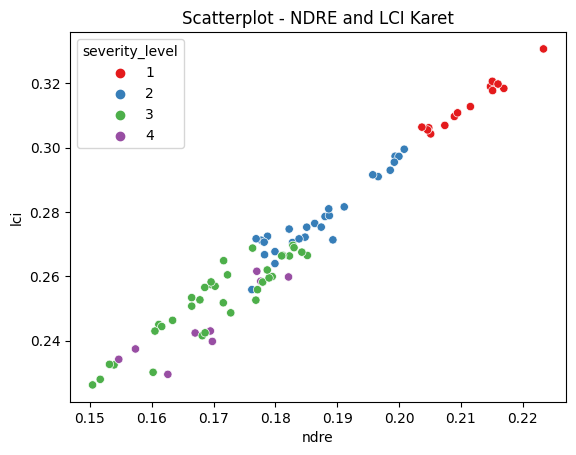

In [31]:
# Show scatterplot
sns.scatterplot(x='ndre', y='lci', data=df_remove, hue='severity_level', palette='Set1')
plt.title("Scatterplot - NDRE and LCI Karet")
plt.show()

In [32]:
# # Export remove data to csv format
# df_remove.to_csv("remove_overlapping_data.csv", index=False)

### Option 2 : Replace Overlapping Data

In [33]:
# Function to replace overlapping data
def replace_overlapping_data(val_ndre, val_lci):
    if (val_ndre >= 0.205) & (val_lci >= 0.3):
        return 1
    elif (val_ndre <= 0.175) & (val_lci <= 0.27):
        return 3
    else:
        return 2

In [34]:
df_replace = df_copy.copy()
for i in idx1:
    ndre_val = df_replace.loc[i, 'ndre']
    lci_val = df_replace.loc[i, 'lci']
    df_replace.loc[i, 'severity_level'] = replace_overlapping_data(ndre_val, lci_val)

In [39]:
# Show distribution of severity level after replacing of overlapping data
df_replace['severity_level'].value_counts()

severity_level
2    63
3    50
1    22
4     9
Name: count, dtype: int64

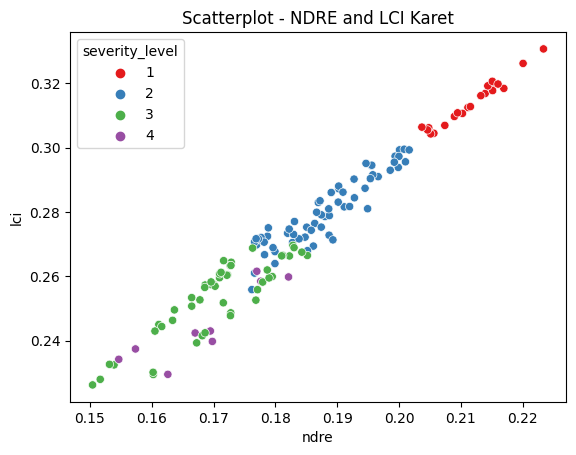

In [40]:
# Show scatterplot
sns.scatterplot(x='ndre', y='lci', data=df_replace, hue='severity_level', palette='Set1')
plt.title("Scatterplot - NDRE and LCI Karet")
plt.show()

In [41]:
# # Export remove data to csv format
# df_replace.to_csv("replace_overlapping_data.csv", index=False)